In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import scipy
from PIL import Image
from scipy import ndimage
import gdal
import os
import geopandas as gpd
from skimage import io
from skimage.io import imread
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\Lenovo\anaconda3\envs\env_1\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# reading the masked tif images and forming a dataset.

In [3]:
path = ["E:\Internship_Harvesting\Dataset\DHAR\masked\\DHAR_10_masked.tif",
       "E:\Internship_Harvesting\Dataset\DHAR\masked\\DHAR_11_masked.tif",
       "E:\Internship_Harvesting\Dataset\DHAR\masked\\DHAR_12_masked.tif",
       "E:\Internship_Harvesting\Dataset\DHAR\masked\\DHAR_01_masked.tif",
       "E:\Internship_Harvesting\Dataset\DHAR\masked\\DHAR_02_masked.tif",
       "E:\Internship_Harvesting\Dataset\DHAR\masked\\DHAR_03_masked.tif",
       "E:\Internship_Harvesting\Dataset\DHAR\masked\\DHAR_04_masked.tif"]

In [4]:
DHAR_10_masked = gdal.Open(path[0])
DHAR_11_masked = gdal.Open(path[1])
DHAR_12_masked = gdal.Open(path[2])
DHAR_01_masked = gdal.Open(path[3])
DHAR_02_masked = gdal.Open(path[4])
DHAR_03_masked = gdal.Open(path[5])
DHAR_04_masked = gdal.Open(path[6])

In [5]:
print(DHAR_10_masked.RasterYSize, DHAR_10_masked.RasterXSize, DHAR_10_masked.RasterCount)
print(DHAR_11_masked.RasterYSize, DHAR_11_masked.RasterXSize, DHAR_11_masked.RasterCount)
print(DHAR_12_masked.RasterYSize, DHAR_12_masked.RasterXSize, DHAR_12_masked.RasterCount)
print(DHAR_01_masked.RasterYSize, DHAR_01_masked.RasterXSize, DHAR_01_masked.RasterCount)
print(DHAR_02_masked.RasterYSize, DHAR_02_masked.RasterXSize, DHAR_02_masked.RasterCount)
print(DHAR_03_masked.RasterYSize, DHAR_03_masked.RasterXSize, DHAR_03_masked.RasterCount)
print(DHAR_04_masked.RasterYSize, DHAR_04_masked.RasterXSize, DHAR_04_masked.RasterCount)

4129 4610 1
4129 4610 1
4129 4610 1
4129 4610 1
4129 4610 1
4129 4610 1
4129 4610 1


In [10]:
DHAR_10_masked_arr = DHAR_10_masked.GetRasterBand(1).ReadAsArray()
DHAR_11_masked_arr = DHAR_11_masked.GetRasterBand(1).ReadAsArray()
DHAR_12_masked_arr = DHAR_12_masked.GetRasterBand(1).ReadAsArray()
DHAR_01_masked_arr = DHAR_01_masked.GetRasterBand(1).ReadAsArray()
DHAR_02_masked_arr = DHAR_02_masked.GetRasterBand(1).ReadAsArray()
DHAR_03_masked_arr = DHAR_03_masked.GetRasterBand(1).ReadAsArray()
DHAR_04_masked_arr = DHAR_04_masked.GetRasterBand(1).ReadAsArray()

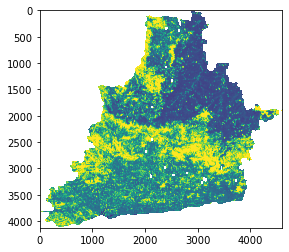

In [90]:
plt.imshow(abcd_arr)
plt.show()

In [91]:
DHAR_10_outside_index = np.argwhere(np.isnan(abcd_arr))

# creating an array which only consists the indices having value = 2, meaning the indices inside DHAR map but non-agriculture and then assigning them to nan

In [12]:
DHAR_10_2_index = np.argwhere(DHAR_10_masked_arr == 2)

In [15]:
for i in range(DHAR_10_2_index.shape[0]):
    DHAR_10_masked_arr[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1]] = np.NaN
    DHAR_11_masked_arr[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1]] = np.NaN
    DHAR_12_masked_arr[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1]] = np.NaN
    DHAR_01_masked_arr[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1]] = np.NaN
    DHAR_02_masked_arr[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1]] = np.NaN
    DHAR_03_masked_arr[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1]] = np.NaN
    DHAR_04_masked_arr[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1]] = np.NaN

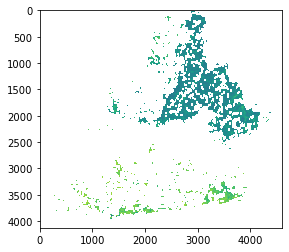

In [17]:
plt.imshow(DHAR_10_masked_arr)
plt.show()

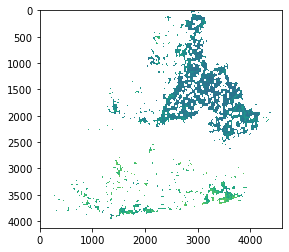

In [18]:
plt.imshow(DHAR_11_masked_arr)
plt.show()

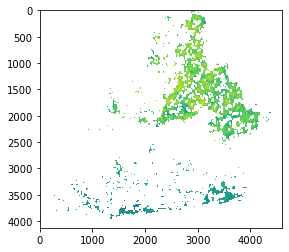

In [19]:
plt.imshow(DHAR_12_masked_arr)
plt.show()

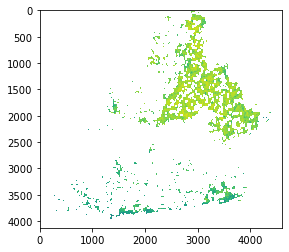

In [20]:
plt.imshow(DHAR_01_masked_arr)
plt.show()

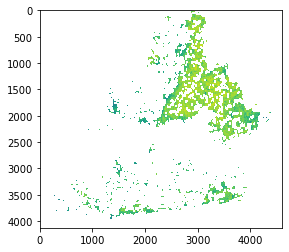

In [21]:
plt.imshow(DHAR_02_masked_arr)
plt.show()

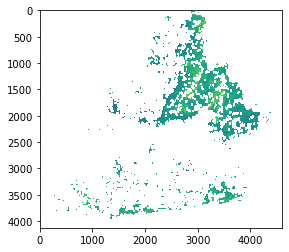

In [22]:
plt.imshow(DHAR_03_masked_arr)
plt.show()

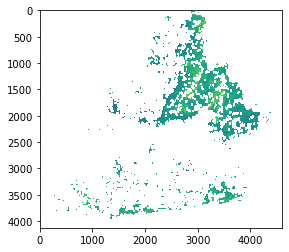

In [23]:
plt.imshow(DHAR_04_masked_arr)
plt.show()

# Getting all indices with agriculture pixels and storing them in an array

In [24]:
DHAR_10_non_nan_index = np.argwhere(~np.isnan(DHAR_10_masked_arr))

In [25]:
DHAR_10_non_nan_index.shape

(6471449, 2)

# We have the required images, will concatenate them in single array

In [26]:
test_x = np.zeros((1, 6471449))

In [27]:
for p in path:
    print(p)
    
    image = gdal.Open(p)
    
    image_array = image.GetRasterBand(1).ReadAsArray()
    print(image_array.shape)
    sample = []
    
    for i in range(DHAR_10_non_nan_index.shape[0]):
        sample.append(image_array[DHAR_10_non_nan_index[i,0], DHAR_10_non_nan_index[i,1]])
        
    sample = np.array(sample)
    
    sample = sample.reshape(1, 6471449)
        
    test_x = np.concatenate((sample, test_x), axis = 0)
    
    print(test_x.shape)
    
    print("***************")
    

E:\Internship_Harvesting\Dataset\DHAR\masked\DHAR_10_masked.tif
(4129, 4610)
(2, 6471449)
***************
E:\Internship_Harvesting\Dataset\DHAR\masked\DHAR_11_masked.tif
(4129, 4610)
(3, 6471449)
***************
E:\Internship_Harvesting\Dataset\DHAR\masked\DHAR_12_masked.tif
(4129, 4610)
(4, 6471449)
***************
E:\Internship_Harvesting\Dataset\DHAR\masked\DHAR_01_masked.tif
(4129, 4610)
(5, 6471449)
***************
E:\Internship_Harvesting\Dataset\DHAR\masked\DHAR_02_masked.tif
(4129, 4610)
(6, 6471449)
***************
E:\Internship_Harvesting\Dataset\DHAR\masked\DHAR_03_masked.tif
(4129, 4610)
(7, 6471449)
***************
E:\Internship_Harvesting\Dataset\DHAR\masked\DHAR_04_masked.tif
(4129, 4610)
(8, 6471449)
***************


In [30]:
test_x = test_x[:7, :]

In [31]:
test_x.shape

(7, 6471449)

In [33]:
test_x = test_x.T

In [34]:
test_x.shape

(6471449, 7)

# we have our test data, we will apply K-means unsupervised algorithm on this and capture details

# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

# reference for the below mentioned code

In [44]:
wcss = []

In [45]:
for i in range(1, 6):
    
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=50, n_init=5, random_state=0)
    print("1", i)
    kmeans.fit(test_x)
    print("2", i)
    wcss.append(kmeans.inertia_)
    print("3", i)

1 1
2 1
3 1
1 2
2 2
3 2


In [46]:
wcss

([1253347.2971025514,
  827334.8747039939,
  597802.217719155,
  504735.9670516945,
  447924.1409360185,
  1253347.2971025514,
  827334.7707423616],
 [])

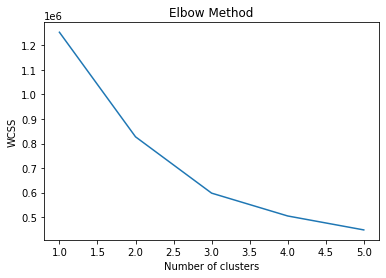

In [38]:
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# cluster = 2

In [39]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=50, n_init=5, random_state=0)
test_y_2 = kmeans.fit_predict(test_x)

In [40]:
np.unique(test_y_2)

array([0, 1])

In [113]:
np.sum(test_y_2)

3478176

In [41]:
test_y_2.shape, test_x.shape

((6471449,), (6471449, 7))

In [43]:
test_y_2 = test_y_2.reshape(6471449, 1)
test_y_2.shape

(6471449, 1)

### since we have got the prediction of the agriculture pixels, we would map it to corresponding index

In [97]:
DHAR_10_2_index.shape, DHAR_10_non_nan_index.shape, DHAR_10_outside_index.shape

((3357226, 2), (6471449, 2), (9206015, 2))

In [98]:
result_2_index = np.concatenate((DHAR_10_non_nan_index, test_y_2), axis = 1)
result_2_index

array([[   0, 2860,    1],
       [   0, 2861,    0],
       [   0, 2862,    0],
       ...,
       [4116,  369,    1],
       [4116,  370,    1],
       [4116,  371,    1]], dtype=int64)

In [109]:
result_2_index_0 = result_2_index[:, :2][result_2_index[:, 2] == 0]

In [114]:
result_2_index_0.shape

(2993273, 2)

In [115]:
result_2_index_1 = result_2_index[:, :2][result_2_index[:, 2] == 1]

In [116]:
result_2_index_1.shape

(3478176, 2)

In [101]:
result_2 = np.zeros((4129, 4610, 3))

In [102]:
result_2 = result_2.astype('int')

In [103]:
for i in range(DHAR_10_outside_index.shape[0]):
    result_2[DHAR_10_outside_index[i,0], DHAR_10_outside_index[i,1], :] = 255

In [105]:
for i in range(DHAR_10_2_index.shape[0]):
    result_2[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1], 0] = 255

In [117]:
for i in range(result_2_index_0.shape[0]):
    result_2[result_2_index_0[i,0], result_2_index_0[i,1], 1] = 255

In [118]:
for i in range(result_2_index_1.shape[0]):
    result_2[result_2_index_1[i,0], result_2_index_1[i,1], 2] = 255

In [119]:
np.unique(result_2)

array([  0, 255])

### here,
### green --> 0 during classification
### blue --> 1 during classification
### red --> inside map non-agriculture
### white --> outside map

In [120]:
result_2 = result_2.astype("uint8")

In [121]:
result_2.shape

(4129, 4610, 3)

### saving result array in .jpg and .tif form

In [122]:
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\Result\\DHAR_predict_2_color.jpg", result_2)

In [146]:
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\Result\\DHAR_predict_2_color.tif", result_2)

# Cluster = 3

In [47]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=50, n_init=5, random_state=0)
test_y_3 = kmeans.fit_predict(test_x)

In [48]:
np.unique(test_y_3)

array([0, 1, 2])

In [49]:
test_y_3.shape, test_x.shape

((6471449,), (6471449, 7))

In [50]:
test_y_3 = test_y_3.reshape(6471449, 1)
test_y_3.shape

(6471449, 1)

### since we have got the prediction of the agriculture pixels, we would map it to corresponding index

In [128]:
DHAR_10_2_index.shape, DHAR_10_non_nan_index.shape, DHAR_10_outside_index.shape

((3357226, 2), (6471449, 2), (9206015, 2))

In [123]:
result_3_index = np.concatenate((DHAR_10_non_nan_index, test_y_3), axis = 1)
result_3_index

array([[   0, 2860,    2],
       [   0, 2861,    2],
       [   0, 2862,    2],
       ...,
       [4116,  369,    1],
       [4116,  370,    1],
       [4116,  371,    1]], dtype=int64)

In [124]:
result_3_index_0 = result_3_index[:, :2][result_3_index[:, 2] == 0]

In [125]:
result_3_index_1 = result_3_index[:, :2][result_3_index[:, 2] == 1]

In [126]:
result_3_index_2 = result_3_index[:, :2][result_3_index[:, 2] == 2]

In [127]:
result_3_index_0.shape, result_3_index_1.shape, result_3_index_2.shape

((1935232, 2), (1770468, 2), (2765749, 2))

In [129]:
result_3 = np.zeros((4129, 4610, 3))

In [130]:
result_3 = result_3.astype('int')

In [131]:
for i in range(DHAR_10_outside_index.shape[0]):
    result_3[DHAR_10_outside_index[i,0], DHAR_10_outside_index[i,1], :] = 255

In [132]:
for i in range(DHAR_10_2_index.shape[0]):
    result_3[DHAR_10_2_index[i,0], DHAR_10_2_index[i,1], 0] = 255

In [133]:
for i in range(result_3_index_0.shape[0]):
    result_3[result_3_index_0[i,0], result_3_index_0[i,1], 1] = 255

In [134]:
for i in range(result_3_index_1.shape[0]):
    result_3[result_3_index_1[i,0], result_3_index_1[i,1], 2] = 255

In [139]:
for i in range(result_3_index_2.shape[0]):
    result_3[result_3_index_2[i,0], result_3_index_2[i,1], 0] = 255
    result_3[result_3_index_2[i,0], result_3_index_2[i,1], 1] = 255

In [141]:
np.unique(result_3)

array([  0, 255])

### here,
### green --> 0 during classification
### blue --> 1 during classification
### yellow --> 2 during classification
### red --> inside map non-agriculture
### white --> outside map

In [142]:
result_3 = result_3.astype("uint8")

In [143]:
result_3.shape

(4129, 4610, 3)

### saving result array in .jpg and .tif form

In [144]:
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\Result\\DHAR_predict_3_color.jpg", result_3)

In [145]:
io.imsave("E:\\Internship_Harvesting\\Dataset\\DHAR\\Result\\DHAR_predict_3_color.tif", result_3)